### prototype ablation和classifier head strategies结果 summary，关于prototype的实验结果

In [3]:
%config InlineBackend.figure_format = 'svg' 
# 如果要保存svg格式图片，可以用上面的命令

import os
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# %matplotlib inline

# plt.style.use("ggplot")

下述关于seaborn和matplotlib的字体管理，参考文章 https://zhuanlan.zhihu.com/p/437747308

In [4]:
### font management
import matplotlib.font_manager as font_manager

# font_manager._rebuild()
for font in font_manager.fontManager.ttflist:
    print(font)
    break

print(plt.rcParams["font.family"])
print(plt.rcParams['font.sans-serif'])

FontEntry(fname='/home/cyyan/anaconda3/envs/torch20/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-BoldItalic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')
['Times New Roman']
['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif']


In [5]:
sns.set_theme(style="white",font='Times New Roman')

上述字体可能在后面用的时候，提示findfont: Font family 'Arial' not found. 

因此需要手动配置字体，将windows的对应字体（ttf文件）复制到对应linux位置anaconda下matplotlib 的font位置，比如 `anaconda3/envs/py38/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf`这里，然后`rm -r ~/.cache/matplotlib`删除缓冲，重启终端即可。

参考下述文档
https://blog.csdn.net/qq_40481843/article/details/126337547

HEROHE数据的prototype ablation 对比

In [23]:
from glob import glob

root_path = "/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status"
filename = "summary_metrics_alltimes_kfolds.csv"

## loop 所有满足条件的exp name

mapping_exp = {'Baseline': 'new_ABMIL_tile5k_all',
        'Non PTs': 'PhiTrans_tile5000_twice500_0abmil_0sel_cls_keep_embedd_dim', 
         'Rand. PTs': 'randomprototypes_eval_on_PhiTrans',
         'Init. PTs': 'new_PhiTrans_sim_tile5ktwice500_selfqueryparam_uniform',
         'Cluster PTs': 'new_PhiTrans_align_sim_tile5ktwice500'
         }


total_pd = pd.DataFrame()
for exp_re, exp_name in mapping_exp.items():
    exp_name = os.path.join(root_path, exp_name)
    print(exp_name)
    eval_res = pd.read_csv(os.path.join(exp_name, filename)).iloc[-2:-1, 3:]
    eval_res.insert(0, column="method", value=exp_re)

    total_pd = pd.concat([total_pd, eval_res], axis=0)

total_pd
# total_pd.to_csv(os.path.join(root_path, "HEROHE_prototype_ablation.csv"))

/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status/new_ABMIL_tile5k_all
/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status/PhiTrans_tile5000_twice500_0abmil_0sel_cls_keep_embedd_dim
/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status/randomprototypes_eval_on_PhiTrans
/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status/new_PhiTrans_sim_tile5ktwice500_selfqueryparam_uniform
/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status/new_PhiTrans_align_sim_tile5ktwice500


,method,neg_precision,neg_recall,neg_f1-score,neg_support,pos_precision,pos_recall,pos_f1-score,pos_support,accuracy,macro avg_precision,macro avg_recall,macro avg_f1-score,macro avg_support,weighted avg_precision,weighted avg_recall,weighted avg_f1-score,weighted avg_support,balanced acc,auc
5,Baseline,0.812314,0.553333,0.657553,90.0,0.546440,0.806667,0.651190,60.0,0.654667,0.679377,0.680000,0.654372,150.0,0.705965,0.654667,0.655008,150.0,0.680000,0.724259
5,Non PTs,0.773602,0.720000,0.726789,90.0,0.478302,0.620000,0.538441,60.0,0.680000,0.625952,0.670000,0.632615,150.0,0.655482,0.680000,0.651450,150.0,0.670000,0.724296
5,Rand. PTs,0.790700,0.637778,0.685750,90.0,0.497192,0.673333,0.566201,60.0,0.652000,0.643946,0.655556,0.625976,150.0,0.673297,0.652000,0.637931,150.0,0.655556,0.694481
5,Init. PTs,0.849458,0.617778,0.702318,90.0,0.602568,0.820000,0.686005,60.0,0.698667,0.726013,0.718889,0.694161,150.0,0.750702,0.698667,0.695793,150.0,0.718889,0.784778
5,Cluster PTs,0.860812,0.644444,0.733621,90.0,0.613045,0.836667,0.705573,60.0,0.721333,0.736928,0.740556,0.719597,150.0,0.761705,0.721333,0.722402,150.0,0.740556,0.795481


/home/cyyan/anaconda3/envs/torch20/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/home/cyyan/anaconda3/envs/torch20/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/home/cyyan/anaconda3/envs/torch20/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/home/cyyan/anaconda3/envs/torch20/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/home/cyyan/anaconda3/envs/torch20/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/home/cyyan/anaconda3/envs/torch20/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN ax

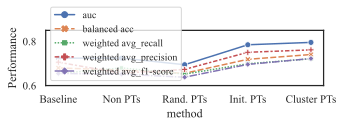

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 1))


sel_pd = total_pd.loc[:, ['method', 'auc', 'balanced acc', 'weighted avg_recall', 'weighted avg_precision', 'weighted avg_f1-score']]

sel_pd = sel_pd.set_index('method')
# print(sel_pd)
# sns.lineplot(data=sel_pd, x=sel_pd.index)

ax.set(
    ylim=[0.6, 0.85],
)
ax.set_ylabel("Performance")

sns.lineplot(data=sel_pd, markers=True, dashes=True, err_style="bars",errorbar=('se', 2), ax=ax)
ax.legend(loc=3, ncols=1, fontsize='small', facecolor="white")


HEROHE 数据集不同head strategies

In [26]:
root_path = "/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status"
filename = "summary_metrics_alltimes_kfolds.csv"

## loop 所有满足条件的exp name
mapping_exp = {'baseline': 'new_ABMIL_tile5k_all',
    'transformer': 'new_PhiTrans_align_sim+tile5ktwice500_trans_sim', 
         'attention score': 'new_PhiTrans_align_sim+tile5ktwice500_cls_abmil_sim',
         'mean': 'new_PhiTrans_align_sim_tile5ktwice500'
}


mapping_color = {'baseline': '#D2D351', # 不用prototype 也不用cross attention
                 'transformer': '#C5D4E0', 
         'attention score': '#dfadfd',
         'mean': '#dafdfa'
}


total_pd = pd.DataFrame()
for exp_re, exp_name in mapping_exp.items():
    exp_name = os.path.join(root_path, exp_name)
    print(exp_name)

    eval_res = pd.read_csv(os.path.join(exp_name, filename)).iloc[:, 3:]
    eval_res.insert(0, column="strategy", value=exp_re)
    total_pd = pd.concat([total_pd, eval_res], axis=0)

total_pd
# total_pd.to_csv(os.path.join(root_path, "classifier_strategies_HEROHE.csv"))




/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status/new_ABMIL_tile5k_all
/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status/new_PhiTrans_align_sim+tile5ktwice500_trans_sim
/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status/new_PhiTrans_align_sim+tile5ktwice500_cls_abmil_sim
/home/cyyan/Projects/HER2proj/models/HEROHE/HER2status/new_PhiTrans_align_sim_tile5ktwice500


,strategy,neg_precision,neg_recall,neg_f1-score,neg_support,pos_precision,pos_recall,pos_f1-score,pos_support,accuracy,macro avg_precision,macro avg_recall,macro avg_f1-score,macro avg_support,weighted avg_precision,weighted avg_recall,weighted avg_f1-score,weighted avg_support,balanced acc,auc
0,baseline,0.803279,0.544444,0.649007,90.0,0.539326,0.800000,0.644295,60.0,0.646667,0.671302,0.672222,0.646651,150.0,0.697698,0.646667,0.647122,150.0,0.672222,0.707222
1,baseline,0.779412,0.588889,0.670886,90.0,0.548780,0.750000,0.633803,60.0,0.653333,0.664096,0.669444,0.652344,150.0,0.687159,0.653333,0.656053,150.0,0.669444,0.737778
2,baseline,0.836364,0.511111,0.634483,90.0,0.536842,0.850000,0.658065,60.0,0.646667,0.686603,0.680556,0.646274,150.0,0.716555,0.646667,0.643915,150.0,0.680556,0.712222
3,baseline,0.836066,0.566667,0.675497,90.0,0.561798,0.833333,0.671141,60.0,0.673333,0.698932,0.700000,0.673319,150.0,0.726358,0.673333,0.673754,150.0,0.700000,0.718704
4,baseline,0.806452,0.555556,0.657895,90.0,0.545455,0.800000,0.648649,60.0,0.653333,0.675953,0.677778,0.653272,150.0,0.702053,0.653333,0.654196,150.0,0.677778,0.745370
5,baseline,0.812314,0.553333,0.657553,90.0,0.546440,0.806667,0.651190,60.0,0.654667,0.679377,0.680000,0.654372,150.0,0.705965,0.654667,0.655008,150.0,0.680000,0.724259
6,baseline,0.024192,0.028760,0.016622,0.0,0.009811,0.038370,0.014156,0.0,0.010954,0.013648,0.012012,0.011062,0.0,0.015535,0.010954,0.011602,0.0,0.012012,0.016541
0,transformer,0.750000,0.700000,0.724138,90.0,0.590909,0.650000,0.619048,60.0,0.680000,0.670455,0.675000,0.671593,150.0,0.686364,0.680000,0.682102,150.0,0.675000,0.754259
1,transformer,0.817073,0.744444,0.779070,90.0,0.661765,0.750000,0.703125,60.0,0.746667,0.739419,0.747222,0.741097,150.0,0.754950,0.746667,0.748692,150.0,0.747222,0.795000
2,transformer,0.797101,0.611111,0.691824,90.0,0.567901,0.766667,0.652482,60.0,0.673333,0.682501,0.688889,0.672153,150.0,0.705421,0.673333,0.676087,150.0,0.688889,0.728519


>>>>>>>>>>>>>>>>>>>>>>>baseline: new_ABMIL_tile5k_all
#D2D351
>>>>>>>>>>>>>>>>>>>>>>>transformer: new_PhiTrans_align_sim+tile5ktwice500_trans_sim
#C5D4E0
>>>>>>>>>>>>>>>>>>>>>>>attention score: new_PhiTrans_align_sim+tile5ktwice500_cls_abmil_sim
#dfadfd
>>>>>>>>>>>>>>>>>>>>>>>mean: new_PhiTrans_align_sim_tile5ktwice500
#dafdfa


[Text(0.35, 0, 'balanced acc'), Text(1.35, 0, 'auc')]

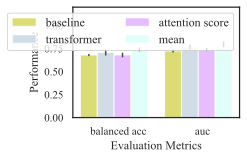

In [27]:

bar_data_mean = {}
bar_data_std = {}
for one_exp in mapping_exp.keys():
    exp_name = mapping_exp[one_exp]
    exp_color = mapping_color[one_exp]

    print(f">>>>>>>>>>>>>>>>>>>>>>>{one_exp}: {exp_name}")

    eval_res = pd.read_csv(os.path.join(root_path, exp_name, filename))
    
    tb_barplot = eval_res.loc[:, ['balanced acc', 'auc']]
    # tb_barplot = eval_res.iloc[:, 3:]

    bar_row_names = tb_barplot.columns

    bar_data_mean.update({one_exp:tb_barplot.iloc[-2,:]})
    bar_data_std.update({one_exp:tb_barplot.iloc[-1,:]})
    
    print(exp_color)



fig, ax = plt.subplots(figsize=(3, 2))

# 创建分组柱状图，需要自己控制x轴坐标
xticks = np.arange(len(bar_row_names))

bar_dist = 0
width = 0.2
for one_exp in bar_data_mean.keys():    
    ax.bar(xticks+bar_dist, bar_data_mean[one_exp], 
           width=width, label=one_exp, color=mapping_color[one_exp],
           alpha=0.8,
           yerr=bar_data_std[one_exp], error_kw={'ecolor': '0.3'},
        #    edgecolor="black",  # 柱子边框的颜色    
        #    linewidth=1.0  # 柱子边框线的大小
           )
    bar_dist += width

# ax.set_title("Grouped Bar plot", fontsize=15)
ax.set_facecolor("white")
ax.set(
    ylim=[0.0, 1.2],
)
ax.set_xlabel("Evaluation Metrics")
ax.set_ylabel("Performance")
ax.legend(loc=0, ncols=2, fontsize='medium', facecolor="white")

# 最后调整x轴标签的位置
ax.set_xticks(xticks + 0.35)
ax.set_xticklabels(bar_row_names)

Yale 数据集 不同prototype ablation对比

In [28]:
root_path = "/home/cyyan/Projects/HER2proj/models/Yale/HER2status"
filename = "summary_metrics_alltimes_kfolds.csv"

mapping_exp = {'Baseline': 'ABMIL_tileAll',
               'Non PTs': 'new_PhiTrans_tileAll_twice1000_0abmil_0sel_cls_keep_embedd_dim', 
               'Rand. PTs': 'randomprototypes_eval_on_PhiTrans',
               'Init. PTs': 'new_PhiTrans_tileAll_twice1000_0abmil_0sel_selfqueryparam_uniform',
               'Cluster PTs': 'new_PhiTrans_tileAll_twice1000_0abmil_0sel'
}



total_pd = pd.DataFrame()
for exp_re, exp_name in mapping_exp.items():
    exp_name = os.path.join(root_path, exp_name)
    print(exp_name)
    eval_res = pd.read_csv(os.path.join(exp_name, filename)).iloc[-2:-1, 3:]
    eval_res.insert(0, column="method", value=exp_re)

    total_pd = pd.concat([total_pd, eval_res], axis=0)

total_pd
# total_pd.to_csv(os.path.join(root_path, "Yale_prototype_ablation.csv"))

/home/cyyan/Projects/HER2proj/models/Yale/HER2status/ABMIL_tileAll
/home/cyyan/Projects/HER2proj/models/Yale/HER2status/new_PhiTrans_tileAll_twice1000_0abmil_0sel_cls_keep_embedd_dim
/home/cyyan/Projects/HER2proj/models/Yale/HER2status/randomprototypes_eval_on_PhiTrans
/home/cyyan/Projects/HER2proj/models/Yale/HER2status/new_PhiTrans_tileAll_twice1000_0abmil_0sel_selfqueryparam_uniform
/home/cyyan/Projects/HER2proj/models/Yale/HER2status/new_PhiTrans_tileAll_twice1000_0abmil_0sel


,method,neg_precision,neg_recall,neg_f1-score,neg_support,pos_precision,pos_recall,pos_f1-score,pos_support,accuracy,macro avg_precision,macro avg_recall,macro avg_f1-score,macro avg_support,weighted avg_precision,weighted avg_recall,weighted avg_f1-score,weighted avg_support,balanced acc,auc
25,Baseline,0.748942,0.814737,0.777705,19.0,0.800602,0.720000,0.754015,19.0,0.767368,0.774772,0.767368,0.765860,38.0,0.774772,0.767368,0.765860,38.0,0.767368,0.819945
25,Non PTs,0.764362,0.772632,0.765326,19.0,0.774886,0.757895,0.761968,19.0,0.765263,0.769624,0.765263,0.763647,38.0,0.769624,0.765263,0.763647,38.0,0.765263,0.826205
25,Rand. PTs,0.697001,0.642105,0.644510,19.0,0.677578,0.717895,0.684174,19.0,0.680000,0.687289,0.680000,0.664342,38.0,0.687289,0.680000,0.664342,38.0,0.680000,0.764211
25,Init. PTs,0.816649,0.816842,0.812929,19.0,0.825919,0.812632,0.814513,19.0,0.814737,0.821284,0.814737,0.813721,38.0,0.821284,0.814737,0.813721,38.0,0.814737,0.892299
25,Cluster PTs,0.825625,0.818947,0.815269,19.0,0.832496,0.818947,0.819560,19.0,0.818947,0.829061,0.818947,0.817415,38.0,0.829061,0.818947,0.817415,38.0,0.818947,0.892742


                  auc  balanced acc  weighted avg_recall  \
method                                                     
Baseline     0.819945      0.767368             0.767368   
Non PTs      0.826205      0.765263             0.765263   
Rand. PTs    0.764211      0.680000             0.680000   
Init. PTs    0.892299      0.814737             0.814737   
Cluster PTs  0.892742      0.818947             0.818947   

             weighted avg_precision  weighted avg_f1-score  
method                                                      
Baseline                   0.774772               0.765860  
Non PTs                    0.769624               0.763647  
Rand. PTs                  0.687289               0.664342  
Init. PTs                  0.821284               0.813721  
Cluster PTs                0.829061               0.817415  


/home/cyyan/anaconda3/envs/torch20/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/home/cyyan/anaconda3/envs/torch20/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/home/cyyan/anaconda3/envs/torch20/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/home/cyyan/anaconda3/envs/torch20/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/home/cyyan/anaconda3/envs/torch20/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/home/cyyan/anaconda3/envs/torch20/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN ax

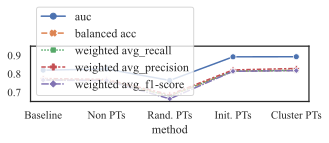

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 1))


sel_pd = total_pd.loc[:, ['method', 'auc', 'balanced acc', 'weighted avg_recall', 'weighted avg_precision', 'weighted avg_f1-score']]

sel_pd = sel_pd.set_index('method')
print(sel_pd)
# sns.lineplot(data=sel_pd, x=sel_pd.index)

ax.set(
    ylim=[0.65, 0.95],
)
sns.lineplot(data=sel_pd, markers=True, dashes=True, err_style="bars",errorbar=('se', 2), ax=ax)
ax.legend(loc=3, ncols=1, fontsize='medium', facecolor="white")


Yale数据集的classifier ehad strategies

In [32]:
root_path = "/home/cyyan/Projects/HER2proj/models/Yale/HER2status"
filename = "summary_metrics_alltimes_kfolds.csv"

## loop 所有满足条件的exp name
mapping_exp = {'baseline': 'ABMIL_tileAll',
    'transformer': 'new_PhiTrans_tileAll_twice1000_0abmil_0sel_trans_sim', 
         'attention score': 'new_PhiTrans_tileAll_twice1000_0abmil_0sel_cls_abmil_sim',
         'mean': 'new_PhiTrans_tileAll_twice1000_0abmil_0sel'
}


mapping_color = {'baseline': '#D2D351', # 不用prototype 也不用cross attention
                 'transformer': '#C5D4E0', 
         'attention score': '#dfadfd',
         'mean': '#dafdfa'
}


total_pd = pd.DataFrame()
for exp_re, exp_name in mapping_exp.items():
    exp_name = os.path.join(root_path, exp_name)
    print(exp_name)

    eval_res = pd.read_csv(os.path.join(exp_name, filename)).iloc[-2:, 3:]
    eval_res.insert(0, column="strategy", value=exp_re)

    total_pd = pd.concat([total_pd, eval_res], axis=0)

total_pd
# total_pd.to_csv(os.path.join(root_path, "classifier_strategies_Yale.csv"))




/home/cyyan/Projects/HER2proj/models/Yale/HER2status/ABMIL_tileAll
/home/cyyan/Projects/HER2proj/models/Yale/HER2status/new_PhiTrans_tileAll_twice1000_0abmil_0sel_trans_sim
/home/cyyan/Projects/HER2proj/models/Yale/HER2status/new_PhiTrans_tileAll_twice1000_0abmil_0sel_cls_abmil_sim
/home/cyyan/Projects/HER2proj/models/Yale/HER2status/new_PhiTrans_tileAll_twice1000_0abmil_0sel


,strategy,neg_precision,neg_recall,neg_f1-score,neg_support,pos_precision,pos_recall,pos_f1-score,pos_support,accuracy,macro avg_precision,macro avg_recall,macro avg_f1-score,macro avg_support,weighted avg_precision,weighted avg_recall,weighted avg_f1-score,weighted avg_support,balanced acc,auc
25,baseline,0.748942,0.814737,0.777705,19.0,0.800602,0.720000,0.754015,19.0,0.767368,0.774772,0.767368,0.765860,38.0,0.774772,0.767368,0.765860,38.0,0.767368,0.819945
26,baseline,0.087968,0.096236,0.077359,0.0,0.091910,0.109266,0.084181,0.0,0.079196,0.080623,0.079196,0.079362,0.0,0.080623,0.079196,0.079362,0.0,0.079196,0.084404
25,transformer,0.767193,0.772632,0.762796,19.0,0.777465,0.751579,0.757160,19.0,0.762105,0.772329,0.762105,0.759978,38.0,0.772329,0.762105,0.759978,38.0,0.762105,0.826260
26,transformer,0.105771,0.122229,0.084973,0.0,0.095925,0.126681,0.084114,0.0,0.080926,0.083528,0.080926,0.081217,0.0,0.083528,0.080926,0.081217,0.0,0.080926,0.077267
25,attention score,0.790004,0.831579,0.804820,19.0,0.830936,0.768421,0.791584,19.0,0.800000,0.810470,0.800000,0.798202,38.0,0.810470,0.800000,0.798202,38.0,0.800000,0.876565
26,attention score,0.069125,0.099630,0.053299,0.0,0.080711,0.103047,0.056731,0.0,0.050960,0.051086,0.050960,0.051599,0.0,0.051086,0.050960,0.051599,0.0,0.050960,0.035843
25,mean,0.825625,0.818947,0.815269,19.0,0.832496,0.818947,0.819560,19.0,0.818947,0.829061,0.818947,0.817415,38.0,0.829061,0.818947,0.817415,38.0,0.818947,0.892742
26,mean,0.062550,0.122569,0.063968,0.0,0.093092,0.080511,0.048094,0.0,0.052807,0.052514,0.052807,0.053588,0.0,0.052514,0.052807,0.053588,0.0,0.052807,0.041184


>>>>>>>>>>>>>>>>>>>>>>>baseline: ABMIL_tileAll
#D2D351
>>>>>>>>>>>>>>>>>>>>>>>transformer: new_PhiTrans_tileAll_twice1000_0abmil_0sel_trans_sim
#C5D4E0
>>>>>>>>>>>>>>>>>>>>>>>attention score: new_PhiTrans_tileAll_twice1000_0abmil_0sel_cls_abmil_sim
#dfadfd
>>>>>>>>>>>>>>>>>>>>>>>mean: new_PhiTrans_tileAll_twice1000_0abmil_0sel
#dafdfa


[Text(0.35, 0, 'balanced acc'), Text(1.35, 0, 'auc')]

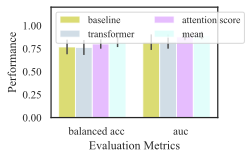

In [98]:

bar_data_mean = {}
bar_data_std = {}
for one_exp in mapping_exp.keys():
    exp_name = mapping_exp[one_exp]
    exp_color = mapping_color[one_exp]

    print(f">>>>>>>>>>>>>>>>>>>>>>>{one_exp}: {exp_name}")

    eval_res = pd.read_csv(os.path.join(root_path, exp_name, filename))
    
    tb_barplot = eval_res.loc[:, ['balanced acc', 'auc']]
    # tb_barplot = eval_res.iloc[:, 3:]

    bar_row_names = tb_barplot.columns

    bar_data_mean.update({one_exp:tb_barplot.iloc[-2,:]})
    bar_data_std.update({one_exp:tb_barplot.iloc[-1,:]})
    
    print(exp_color)



fig, ax = plt.subplots(figsize=(3, 2))

# 创建分组柱状图，需要自己控制x轴坐标
xticks = np.arange(len(bar_row_names))

bar_dist = 0
width = 0.2
for one_exp in bar_data_mean.keys():    
    ax.bar(xticks+bar_dist, bar_data_mean[one_exp], 
           width=width, label=one_exp, color=mapping_color[one_exp],
           alpha=0.8,
           yerr=bar_data_std[one_exp], error_kw={'ecolor': '0.3'},
        #    edgecolor="black",  # 柱子边框的颜色    
        #    linewidth=1.0  # 柱子边框线的大小
           )
    bar_dist += width

# ax.set_title("Grouped Bar plot", fontsize=15)
ax.set_facecolor("white")
ax.set(
    ylim=[0.0, 1.20],
)
ax.set_xlabel("Evaluation Metrics")
ax.set_ylabel("Performance")
ax.legend(loc=2, ncols=2, fontsize='small', facecolor="white")

# 最后调整x轴标签的位置
ax.set_xticks(xticks + 0.35)
ax.set_xticklabels(bar_row_names)